# Asia Pacific AllBox Histogram
 Histograma aproximado con Presto

In [23]:
from stats_util import get_cloudwatch_times_serie
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import math
from datetime import datetime

time, cap = get_cloudwatch_times_serie(datetime(2019, 1, 22,19),datetime(2019, 1, 22,20),'us-east-2','cap')
time, cap_silver = get_cloudwatch_times_serie(datetime(2019, 1, 22,20),datetime(2019, 1, 22,22),'us-east-2','cap')

time, eff = get_cloudwatch_times_serie(datetime(2019, 1, 22,19),datetime(2019, 1, 22,20),'us-east-2','eff')
time, eff_silver = get_cloudwatch_times_serie(datetime(2019, 1, 22,20),datetime(2019, 1, 22,22),'us-east-2','eff')

time, bids = get_cloudwatch_times_serie(datetime(2019, 1, 22,19),datetime(2019, 1, 22,20),'us-east-2','bids')
time, bids_silver = get_cloudwatch_times_serie(datetime(2019, 1, 22,20),datetime(2019, 1, 22,22),'us-east-2','bids')
"done"

'done'

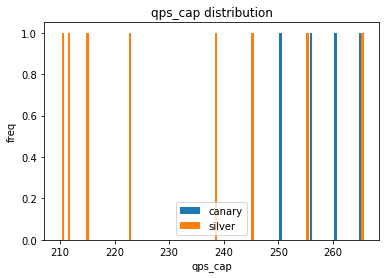

In [24]:
def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x * 1e-6)
cap = np.array(cap)
cap_silver = np.array(cap_silver)
plt.hist([cap, cap_silver], bins=50, label=['canary', 'silver'])

plt.title('qps_cap distribution')
plt.xlabel('qps_cap')
plt.ylabel('freq')
plt.legend()
plt.show()

In [3]:
(cap.mean(),math.sqrt(cap.var()), cap_silver.mean(),math.sqrt(cap_silver.var()))

(273.9747297359125, 41.40497363700438, 254.12872100043998, 51.486168544714445)

  ### Chi Square Test
Determine whether there is a significant difference between the expected frequencies and the observed frequencies in one or more categories.

H0: Both distribution frequencies of Non-Silver and Silver are equals
H1: Samples form Silver and Non-Silver belongs to two diferent distributions

PD: try  Kolmogorov–Smirnov test 


In [6]:
from scipy import stats


dice = np.array([cap,cap_silver])
# stats.chi2_contingency(dice)
# chi2_stat, p_val, dof, ex = stats.chi2_contingency(dice)
# chi2_stat, p_val, dof

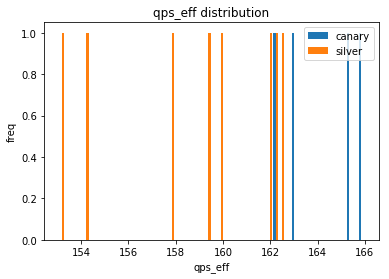

(164.11222293265132, 1.5649821964082515, 158.88306841068677, 3.401030674172284)

In [25]:
eff = np.array(eff)
eff_silver = np.array(eff_silver)
plt.hist([eff, eff_silver], bins=50, label=['canary', 'silver'])

plt.title('qps_eff distribution')
plt.xlabel('qps_eff')
plt.ylabel('freq')
plt.legend()
plt.show()
(eff.mean(),math.sqrt(eff.var()), eff_silver.mean(),math.sqrt(eff_silver.var()))

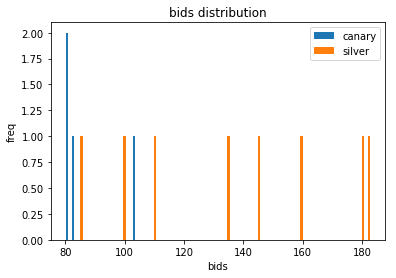

(86.61609921142369, 9.91075471329902, 136.68209582169987, 34.465545030760765)

In [26]:
bids = np.array(bids)
bids_silver = np.array(bids_silver)
plt.hist([bids, bids_silver], bins=50, label=['canary', 'silver'])

plt.title('bids distribution')
plt.xlabel('bids')
plt.ylabel('freq')
plt.legend()
plt.show()
(bids.mean(),math.sqrt(bids.var()), bids_silver.mean(),math.sqrt(bids_silver.var()))